Além de RGB, BGR e HSV, existem outros padrões de cores que podem ser úteis em processamento de imagens, especialmente para lidar com problemas de iluminação e criar representações mais consistentes para detecção e segmentação de objetos. Vamos explorar alguns desses padrões e como eles podem ajudar:

### 1. **YUV e YCbCr**
   - **YUV** e **YCbCr** são padrões que separam a intensidade da cor dos componentes de cor. O componente **Y** representa a luminosidade (brilho), enquanto **U** e **V** ou **Cb** e **Cr** representam as informações de cor (crominância).
   - **Vantagens**: Esses padrões são eficazes para corrigir problemas de iluminação, pois permitem que você trabalhe apenas com o canal de intensidade (**Y**) para ajustar a iluminação, sem afetar a cor. Isso é útil para melhorar a qualidade da imagem em ambientes com variação de luz.
   - **Uso comum**: Eles são amplamente usados em compressão de vídeo e transmissão, pois ajudam a reduzir a quantidade de dados necessários sem muita perda de qualidade visual.

### 2. **Lab (CIELAB)**
   - O espaço de cor **Lab** (ou **CIELAB**) é composto pelos canais **L** (luminosidade), **a** (verde-vermelho) e **b** (azul-amarelo).
   - **Vantagens**: Lab é mais perceptualmente uniforme que RGB, o que significa que pequenas mudanças no valor de um componente resultam em pequenas mudanças visíveis. O canal **L** é separado da informação de cor, o que permite ajustar brilho e contraste sem impactar as cores.
   - **Uso comum**: Lab é bastante usado para segmentação de cores e processamento de imagens em cenários onde é necessário preservar a aparência das cores, mesmo com ajustes de luminosidade.

### 3. **HSL e HSI (Hue, Saturation, Lightness/Intensity)**
   - **HSL** e **HSI** são variações do HSV, mas com interpretações ligeiramente diferentes para o componente de brilho. O **HSL** (Hue, Saturation, Lightness) pode ser mais adequado para ajustar a iluminação porque possui uma interpretação linear do brilho.
   - **Vantagens**: Esses espaços permitem controlar a tonalidade independentemente da intensidade ou luminosidade, o que ajuda em situações com iluminação variável, destacando cores sem afetar o brilho.
   - **Uso comum**: HSL e HSI são frequentemente usados em processamento de imagens para edição de fotos, filtros e segmentação, onde a separação de brilho e cor é importante.

### 4. **XYZ (CIE 1931)**
   - **XYZ** é um padrão baseado em como os humanos percebem as cores. Ele foi criado para representar todas as cores visíveis, com base na resposta do olho humano.
   - **Vantagens**: Esse espaço é usado como base para conversões para outros padrões e serve como um intermediário para calcular correções de cor e adaptações para iluminação.
   - **Uso comum**: XYZ não é usado diretamente para manipulação de imagem no dia a dia, mas é útil como uma base para conversões precisas e para aplicações que exigem fidelidade de cor.

### 5. **YIQ (usado na TV NTSC)**
   - **YIQ** separa a imagem em componentes de luminância (**Y**) e crominância (**I** e **Q**). Ele é similar a YUV e foi projetado para transmissão de vídeo NTSC.
   - **Vantagens**: Como o componente Y contém informações de brilho, ele pode ser processado para melhorar a iluminação, enquanto **I** e **Q** mantêm as cores intactas.
   - **Uso comum**: Esse padrão é mais comum em sistemas de vídeo antigos, mas ainda pode ser usado em processamento de imagem onde a iluminação é um fator significativo.

### Em Python: Como usar esses padrões
A biblioteca **OpenCV** oferece suporte para converter imagens entre muitos desses padrões. Para isso, você pode usar a função `cv2.cvtColor`. Exemplo de como converter para Lab e YUV:

```python
import cv2

# Carregar a imagem
image = cv2.imread("image.jpg")

# Converter para YUV
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Converter para Lab
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
```

### Escolhendo o padrão de cor certo
- **Para problemas de iluminação**: Experimente YUV, YCbCr, ou Lab, pois todos separam a intensidade da cor.
- **Para ajuste fino de tonalidades**: HSV ou HSL são bons para segmentação baseada em cor.
- **Para processamento de vídeo ou transmissão**: YUV ou YIQ podem ajudar a otimizar a eficiência sem perder muita qualidade visual.

Esses padrões de cor são úteis para alcançar maior consistência visual e robustez ao lidar com variações de iluminação e contraste, muito comuns em imagens do mundo real.


Os padrões **LUV** e **MLAP** são alternativas menos comuns, mas também poderosas, para representar cores em imagens, cada uma com suas características e usos específicos. Vamos detalhar cada um deles e entender suas vantagens e aplicações.

### 1. **LUV (CIE LUV)**
   - **LUV** é um espaço de cor criado pela **Comissão Internacional de Iluminação** (CIE) e é semelhante ao Lab, mas foi desenvolvido com um foco especial na uniformidade perceptual em diferentes condições de iluminação.
   - Ele é composto por três componentes:
     - **L**: Luminosidade (similar ao "L" no Lab, representa a intensidade ou brilho).
     - **U** e **V**: Coordenadas de cromaticidade, que representam a tonalidade e saturação da cor.
   - **Vantagens**: LUV é perceptualmente mais uniforme e responde melhor a variações de iluminação do que outros espaços de cor como RGB e HSV. Ele é especialmente útil em situações onde a iluminação varia bastante, como em fotografias ao ar livre, onde a luz pode mudar de uma região para outra.
   - **Aplicações**: LUV é bastante utilizado em visão computacional, especialmente para problemas de segmentação e detecção de objetos sob diferentes condições de luz. O canal de luminância (L) pode ser manipulado para compensar iluminação sem alterar os valores de cromaticidade, o que ajuda na robustez da análise.
   - **Uso em Python (OpenCV)**:
     ```python
     import cv2
     image = cv2.imread("image.jpg")
     luv_image = cv2.cvtColor(image, cv2.COLOR_BGR2Luv)
     ```
  
### 2. **MLAP (Mean Local Adaptation Pooling)**
   - **MLAP** (Mean Local Adaptation Pooling) não é exatamente um espaço de cor, mas uma técnica de pré-processamento de imagem usada para melhorar a robustez do processamento de imagem em condições de iluminação variável.
   - **Funcionamento**: O conceito por trás do MLAP é normalizar a iluminação local em uma imagem. Ele ajusta a intensidade dos pixels com base na média de intensidade local, o que ajuda a equalizar áreas com diferentes condições de luz.
   - **Vantagens**: MLAP ajuda a destacar detalhes que poderiam ser obscurecidos por iluminação irregular. Esse tipo de processamento pode ser particularmente útil em sistemas de visão computacional que precisam extrair informações consistentes de imagens capturadas em ambientes com sombras ou iluminação desigual.
   - **Aplicações**: É usado principalmente em visão computacional para segmentação, detecção de bordas e reconhecimento de padrões. A técnica é benéfica em imagens médicas, monitoramento de segurança e outras áreas onde a iluminação pode variar significativamente dentro da mesma imagem.
   - **Implementação em Python**: Não existe uma função nativa para MLAP no OpenCV, mas ele pode ser implementado através de uma combinação de técnicas de filtragem, como suavização (blur) e normalização. Aqui está um exemplo simplificado de como você poderia implementar algo semelhante ao MLAP:
     ```python
     import cv2
     import numpy as np

     image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
     
     # Aplicar um filtro de média para suavizar a imagem
     mean_local = cv2.blur(image, (15, 15))
     
     # Normalizar a imagem com base na média local
     mlap_image = cv2.addWeighted(image, 1.5, mean_local, -0.5, 0)
     ```

### Comparando LUV e MLAP com Outros Padrões de Cor
- **LUV**: Oferece uma alternativa perceptualmente uniforme, útil para análise de cor sob condições de iluminação variáveis, sendo uma alternativa interessante ao Lab.
- **MLAP**: Não é exatamente um padrão de cor, mas uma técnica de normalização de iluminação. Ele é valioso quando se trabalha com imagens onde a iluminação varia dentro da cena, melhorando a consistência visual em regiões com diferentes níveis de brilho.

### Conclusão
- **LUV** é vantajoso em segmentação e análise de cor perceptualmente uniforme, enquanto **MLAP** ajuda a normalizar a iluminação, destacando detalhes ocultos em imagens com condições de luz desiguais.
- Usar ambos em combinação (por exemplo, convertendo uma imagem para o espaço LUV e aplicando MLAP no canal de intensidade) pode fornecer uma representação robusta e invariável à iluminação.

In [5]:
TEST_IMAGE = "carneiro.jpeg"

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Testando LUV

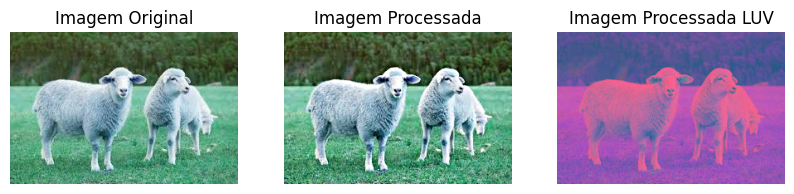

In [7]:


image = cv2.imread(TEST_IMAGE) #cv2.IMREAD_GRAYSCALE

luv = cv2.cvtColor(image, cv2.COLOR_BGR2Luv)

# Aplicar um filtro de média para suavizar a imagem
mean_local = cv2.blur(image, (15, 15))

# Normalizar a imagem com base na média local
mlap_image = cv2.addWeighted(image, 1.5, mean_local, -0.5, 0)

# Plotar as duas imagens lado a lado
plt.figure(figsize=(10, 5))

# Plotar a imagem original
plt.subplot(1, 3, 1)
plt.imshow(image) #cmap='gray'
plt.title('Imagem Original')
plt.axis('off')

# Plotar a imagem processada
plt.subplot(1, 3, 2)
plt.imshow(mlap_image) #cmap='gray'
plt.title('Imagem Processada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(luv) #cmap='gray'
plt.title('Imagem Processada LUV')
plt.axis('off')

plt.show()

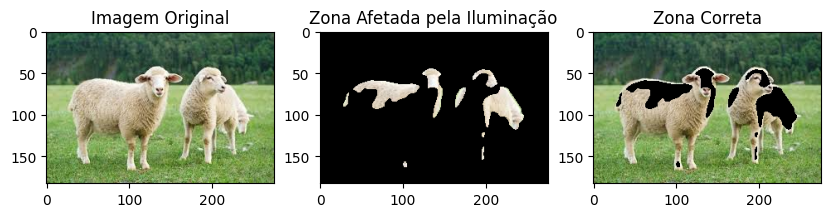

In [8]:
# Converter para escala de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar um filtro de suavização
blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)

# Detectar áreas de alta intensidade
_, thresholded_image = cv2.threshold(blurred_image, 200, 255, cv2.THRESH_BINARY)

# Encontrar contornos das áreas de alta intensidade
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma máscara para destacar a zona afetada
mask = np.zeros_like(gray_image)
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Aplicar a máscara na imagem original
highlighted_image = cv2.bitwise_and(image, image, mask=mask)

# Mostrar a imagem original e a imagem com a zona afetada destacada
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.title('Zona Afetada pela Iluminação')
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.title('Zona Correta')
plt.imshow(cv2.cvtColor(image - highlighted_image, cv2.COLOR_BGR2RGB))
plt.show()

# Teste LAB

In [9]:

import os
def process_image(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)

    # Converter para o espaço de cores LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Separar os canais L, A e B
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Aplicar um filtro de suavização no canal L
    blurred_l_channel = cv2.GaussianBlur(l_channel, (15, 15), 0)

    # Detectar áreas de alta intensidade no canal L
    _, thresholded_l_channel = cv2.threshold(blurred_l_channel, 200, 255, cv2.THRESH_BINARY)

    # Encontrar contornos das áreas de alta intensidade
    contours, _ = cv2.findContours(thresholded_l_channel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma máscara para destacar a zona afetada
    mask = np.zeros_like(l_channel)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Aplicar a máscara no canal L original
    l_channel_highlighted = cv2.bitwise_and(l_channel, l_channel, mask=mask)

    # Combinar os canais L, A e B novamente
    lab_image_highlighted = cv2.merge([l_channel_highlighted, a_channel, b_channel])

    # Converter de volta para o espaço de cores BGR
    highlighted_image = cv2.cvtColor(lab_image_highlighted, cv2.COLOR_LAB2BGR)

    return image, highlighted_image

def process_all_images_in_directory(directory_path: str):
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            original_image, highlighted_image = process_image(image_path)

            # Mostrar a imagem original e a imagem com a zona afetada destacada
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 3, 1)
            plt.title('Imagem Original')
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.subplot(1, 3, 2)
            plt.title('Zona Afetada pela Iluminação')
            plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
            plt.subplot(1, 3, 3)
            plt.title('Zona Sem Iluminação')
            plt.imshow(cv2.cvtColor(original_image - highlighted_image, cv2.COLOR_BGR2RGB))
            plt.show()

# Defina o caminho para o diretório contendo suas imagens
directory_path = "./images"
process_all_images_in_directory(directory_path)

## Segmentacao de iluminacao LAB

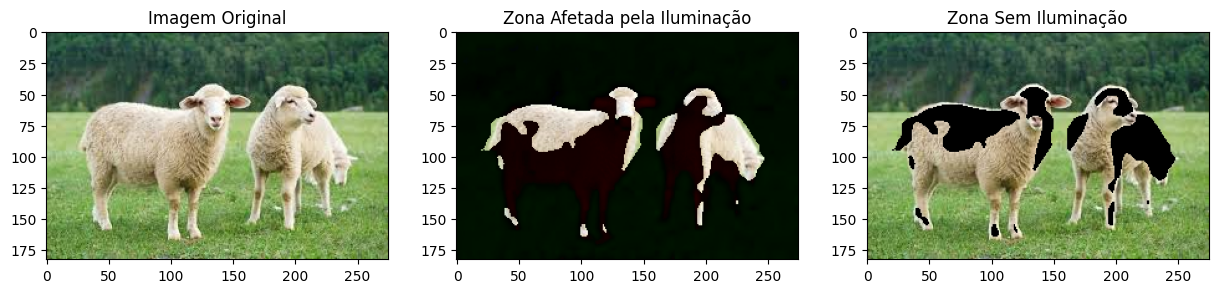

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)

    # Converter para o espaço de cores LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Separar os canais L, A e B
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Aplicar um filtro de suavização no canal L
    blurred_l_channel = cv2.GaussianBlur(l_channel, (15, 15), 0)

    # Detectar áreas de alta intensidade no canal L
    _, thresholded_l_channel = cv2.threshold(blurred_l_channel, 200, 255, cv2.THRESH_BINARY)

    # Encontrar contornos das áreas de alta intensidade
    contours, _ = cv2.findContours(thresholded_l_channel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma máscara para destacar a zona afetada
    mask = np.zeros_like(l_channel)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Aplicar a máscara no canal L original
    l_channel_highlighted = cv2.bitwise_and(l_channel, l_channel, mask=mask)

    # Combinar os canais L, A e B novamente
    lab_image_highlighted = cv2.merge([l_channel_highlighted, a_channel, b_channel])

    # Converter de volta para o espaço de cores BGR
    highlighted_image = cv2.cvtColor(lab_image_highlighted, cv2.COLOR_LAB2BGR)

    # Criar uma máscara invertida para a zona sem iluminação
    mask_inverted = cv2.bitwise_not(mask)

    # Aplicar a máscara invertida na imagem original
    non_illuminated_image = cv2.bitwise_and(image, image, mask=mask_inverted)

    return image, highlighted_image, non_illuminated_image

def process_all_images_in_directory(directory_path: str):
    for filename in os.listdir(directory_path):
        image_path = os.path.join(directory_path, filename)
        original_image, highlighted_image, non_illuminated_image = process_image(image_path)

        # Mostrar a imagem original, a imagem com a zona afetada destacada e a zona sem iluminação
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Imagem Original')
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 2)
        plt.title('Zona Afetada pela Iluminação')
        plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 3)
        plt.title('Zona Sem Iluminação')
        plt.imshow(cv2.cvtColor(non_illuminated_image, cv2.COLOR_BGR2RGB))
        plt.show()

# Defina o caminho para o diretório contendo suas imagens
directory_path = "./images"
process_all_images_in_directory(directory_path)